# 模型評估

## 欠擬合與過擬合

函數不是越複雜越好，需要在欠擬合與過擬合中取得平衡。

以下藉由正弦函數來說明，首先產生隨機的數值



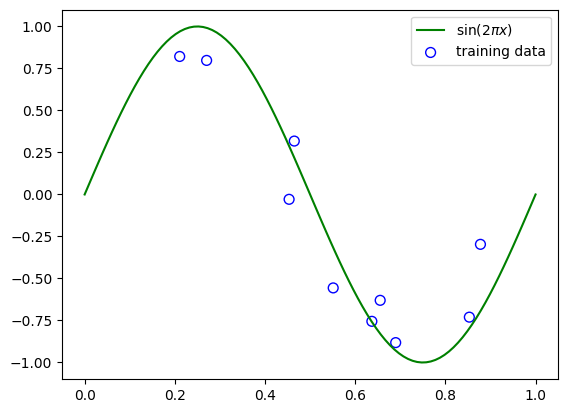

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 設定隨機種子，確保每次執行生成的隨機數（雜訊）都一樣，方便實驗重現
np.random.seed(896)

def sample(n_samples, std = 0.25):
    """
    生成帶有雜訊的樣本數據
    n_samples: 樣本數量
    std: 雜訊的標準差（控制數據偏離正弦波的程度）
    """
    # 在 0 到 1 之間均勻隨機抽取樣本，並進行排序以便後續繪圖
    x = np.sort(np.random.uniform(0, 1, n_samples))

    # 目標值 y = sin(2 * pi * x) + 高斯雜訊 (Normal noise)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale = std, size=x.shape)
    return x, y

# 生成 10 筆訓練用的數據點
n_samples = 10
x, y = sample(n_samples)
# print(x, y)
# mean_y = np.mean(y)
# print(f"mean_y={mean_y}")

# --- 準備繪製真實的函數曲線 (Ground Truth) ---
# 在 0 到 1 之間生成 100 個等間距點，讓曲線看起來平滑
x_test = np.linspace(0, 1, 100)
# 理論上的真實值（不含雜訊的正弦波）
y_test = np.sin(2 * np.pi * x_test)

# 繪圖
plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$") # 畫出綠色正弦波形
plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data") # 畫出藍色空心圓點（訓練集）
plt.legend() # 顯示圖例
plt.show()

In [23]:
for i, K in enumerate([0, 1, 3, 9]):
    a = np.array([np.power(x, k) for k in range(1 + K)])
    print(a)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.21080321 0.27051606 0.4534399  0.46494579 0.55125374 0.63697779
  0.65545015 0.68981333 0.85316892 0.8777954 ]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.21080321 0.27051606 0.4534399  0.46494579 0.55125374 0.63697779
  0.65545015 0.68981333 0.85316892 0.8777954 ]
 [0.044438   0.07317894 0.20560774 0.21617459 0.30388069 0.40574071
  0.4296149  0.47584243 0.72789721 0.77052477]
 [0.00936767 0.01979608 0.09323075 0.10050947 0.16751536 0.25844782
  0.28159115 0.32824245 0.62101928 0.6763631 ]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.10803215e-01 2.70516057e-01 4.53439900e-01 4.64945794e-01
  5.51253740e-01 6.36977793e-01 6.55450153e-01 6.89813327e-01
  8.53168

依據以上所產生出來的在正弦函數中的十組隨機模擬數字，在不同次數的函數來看擬合程度

K=0, w=: [-0.19410186]
K=1, w=: [ 1.167293   -2.40352288]
K=3, w=: [ -0.69160733  14.4684786  -40.54048788  27.82130232]
K=9, w=: [   -4850.58138275    82357.68505859  -572250.33984375  2099805.484375
 -4310128.5         4541129.4375      -994781.625      -2845787.375
  2864116.6875      -860148.5078125 ]


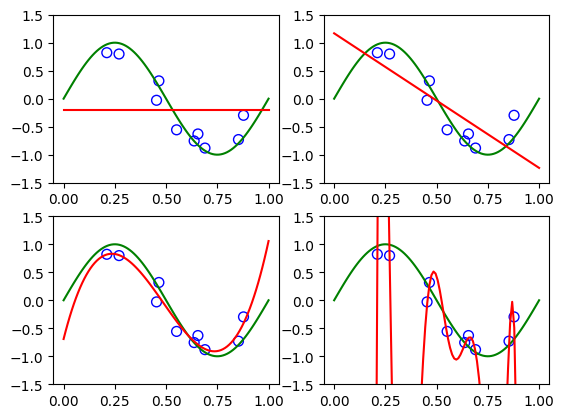

In [24]:
# 1. 建立 2x2 的子圖視窗，比較四種不同的階數 K
for i, K in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)

    # 2. 構造多項式特徵矩陣 (Design Matrix)
    # 這裡包含截距項 x^0 以及直到 x^K 的所有項
    X = np.array([np.power(x, k) for k in range(K+1)])
    X = X.transpose() # 轉置後形狀為 (樣本數, K+1)

    # 3. 使用正規方程 (Normal Equation) 求解 w
    # 公式：w = (X^T * X)^-1 * X^T * y
    # 這是線性回歸的解析解 (Analytical Solution)，不需設定學習率與迭代次數
    XT = X.transpose()
    XTy = XT @ y
    w = np.linalg.inv(XT @ X) @ XTy # 求逆矩陣並進行矩陣乘法
    print(f"K={K}, w=:", w)

    # 4. 生成預測曲線
    # 這裡使用測試集 x_test (100 個點) 來繪製平滑的擬合曲線
    y_predict = 0
    for j, wj in enumerate(w):
        y_predict += wj * np.power(x_test, j)

    # 5. 繪圖診斷
    plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data") # 原始數據
    y_test = np.sin(2 * np.pi * x_test) # 真實函數
    plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$") # 綠線：目標
    plt.plot(x_test, y_predict, c="r", label="fitting")     # 紅線：模型擬合
    plt.ylim(-1.5, 1.5) # 統一 y 軸範圍，方便比較

以下則是用增加樣本數來解決高階次數函數的過度擬合問題，但是仔細觀察，函數不是越高次數越好。

w=: [-6.03748469e-02  1.68918336e+01 -2.40282791e+02  2.07239002e+03
 -9.57345773e+03  2.50977081e+04 -3.92730265e+04  3.65062225e+04
 -1.86196456e+04  4.01347821e+03]


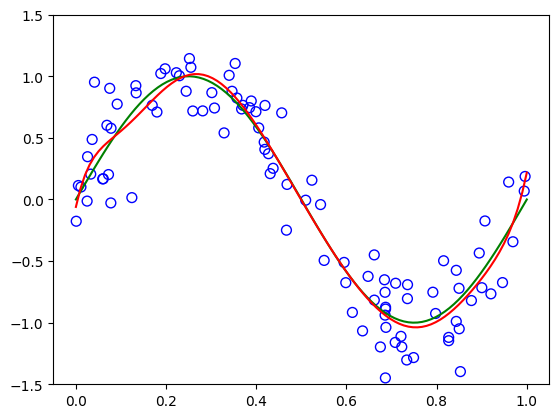

In [25]:
# 1. 增加樣本數到 100 筆
n_samples = 100
x, y = sample(n_samples) # 生成帶有雜訊的正弦波數據

K = 9 # 維持高階多項式，可能使用 2 或 3 即可

# 2. 構造多項式特徵矩陣
# 生成 [x^0, x^1, ..., x^9] 的特徵，形狀為 (100, 10)
X = np.array([np.power(x, k) for k in range(K+1)])
X = X.transpose()

# 3. 使用正規方程 (Normal Equation) 求解 w
# 當數據量變大時，矩陣運算的結果會變得更穩定
XT = X.transpose()
XTy = XT @ y
w = np.linalg.inv(XT @ X) @ XTy
print("w=:", w)

# 4. 在測試集上生成預測曲線
y_predict = 0
for i, wi in enumerate(w):
    y_predict += wi * np.power(x_test, i)

# 5. 繪製圖表
plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")

# 畫出綠色真實函數與紅色模型擬合曲線
y_test = np.sin(2 * np.pi * x_test)
plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$")
plt.plot(x_test, y_predict, c="r", label="fitting")
plt.ylim(-1.5, 1.5)

plt.show()

我修改後的版本，並且加大樣本數

這時就會有一個問題，要使用哪一種階數？


K=0, w=: [0.03578008]
K=1, w=: [ 0.83279831 -1.62823396]
K=2, w=: [ 0.86620078 -1.84062123  0.21025693]
K=3, w=: [ -0.06699673  10.36871514 -31.1187475   20.94155037]
K=4, w=: [-1.32371039e-02  9.08595121e+00 -2.49729338e+01  1.11337289e+01
  4.94905768e+00]
K=5, w=: [ 1.11251584e-01  3.73696755e+00  1.66711964e+01 -1.05179706e+02
  1.38628725e+02 -5.39462038e+01]


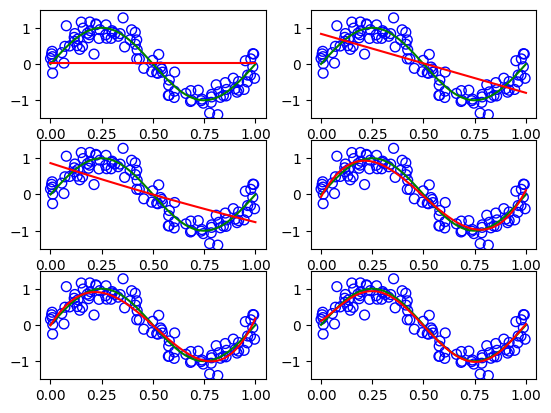

In [26]:
n_samples = 100
x, y = sample(n_samples)

# 1. 建立 2x2 的子圖視窗，比較四種不同的階數 K
for i, K in enumerate([0, 1, 2, 3, 4, 5]):
    plt.subplot(3, 2, i + 1)

    # 2. 構造多項式特徵矩陣 (Design Matrix)
    # 這裡包含截距項 x^0 以及直到 x^K 的所有項
    X = np.array([np.power(x, k) for k in range(K+1)])
    X = X.transpose() # 轉置後形狀為 (樣本數, K+1)

    # 3. 使用正規方程 (Normal Equation) 求解 w
    # 公式：w = (X^T * X)^-1 * X^T * y
    # 這是線性回歸的解析解 (Analytical Solution)，不需設定學習率與迭代次數
    XT = X.transpose()
    XTy = XT @ y
    w = np.linalg.inv(XT @ X) @ XTy # 求逆矩陣並進行矩陣乘法
    print(f"K={K}, w=:", w)

    # 4. 生成預測曲線
    # 這裡使用測試集 x_test (100 個點) 來繪製平滑的擬合曲線
    y_predict = 0
    for j, wj in enumerate(w):
        y_predict += wj * np.power(x_test, j)

    # 5. 繪圖診斷
    plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data") # 原始數據
    y_test = np.sin(2 * np.pi * x_test) # 真實函數
    plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$") # 綠線：目標
    plt.plot(x_test, y_predict, c="r", label="fitting")     # 紅線：模型擬合
    plt.ylim(-1.5, 1.5) # 統一 y 軸範圍，方便比較

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 設定樣本數為 10 筆
n_pts = 10

# 1. 訓練集 (Training Set)：
# 用來訓練模型的權重 (w)，讓模型學習正弦波的趨勢
x_train, y_train = sample(n_pts)

# 2. 驗證集 (Validation Set)：
# 這是「開發中」的測試。用來挑選最適合的超參數（例如：決定多項式要用 3 次還是 9 次）
# 如果在訓練集表現好，但在這裡表現差，就代表發生了過擬合 (Overfitting)
x_valid, y_valid = sample(n_pts)

# 3. 測試集 (Test Set)：
# 這是「最後」的期末考試。當模型架構與參數都決定後，
# 用完全沒看過的測試集來評估模型在現實世界中的真實表現
x_test, y_test = sample(n_pts)

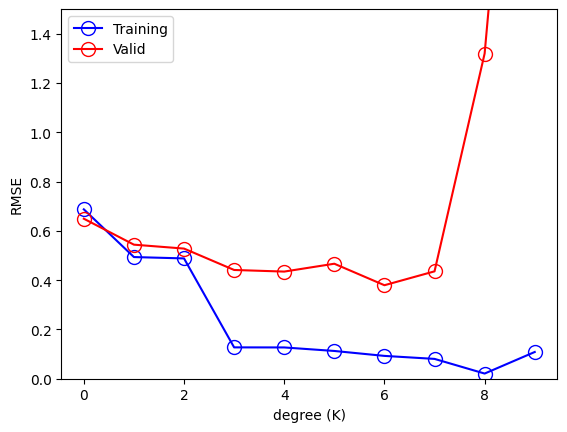

In [28]:
def rmse(a, b):
    """計算均方根誤差 (Root Mean Square Error)"""
    return np.sqrt(np.mean(np.square(a - b)))

M = 10  # 測試最高到 9 次方 (K 變動範圍從 0 到 9)
errors_train, errors_valid = [], []

for K in range(M):
    # --- 1. 特徵工程：建立多項式矩陣 ---
    # 生成包含 [x^0, x^1, ..., x^K] 的矩陣
    X = np.array([np.power(x_train, k) for k in range(K+1)])
    X = X.transpose()

    # --- 2. 使用正規方程 (Normal Equation) 求解權重 w ---
    # 公式: w = (X^T * X)^-1 * X^T * y
    # 這是線性回歸的解析解，不需經過迭代
    XT = X.transpose()
    XTy = XT @ y_train
    w = np.linalg.inv(XT @ X) @ XTy

    # --- 3. 計算訓練集誤差 ---
    predict_train = X @ w
    error_train = rmse(y_train, predict_train)

    # --- 4. 計算驗證集誤差 ---
    # 使用相同的 K 階數處理驗證集特徵
    X_valid = np.array([np.power(x_valid, k) for k in range(K+1)])
    X_valid = X_valid.transpose()
    predict_valid = X_valid @ w # 使用訓練集得到的 w 來預測
    error_valid = rmse(y_valid, predict_valid)

    # 紀錄不同 K 值的誤差
    errors_train.append(error_train)
    errors_valid.append(error_valid)

# --- 5. 繪製模型複雜度曲線 ---
plt.plot(errors_train, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(errors_valid, 'o-', mfc="none", mec="r", ms=10, c="r", label="Valid")
plt.legend()
plt.xlabel("degree (K)")
plt.ylabel("RMSE")
plt.ylim(0, 1.5) # 限制 y 軸範圍以利觀察
plt.show()

In [29]:
def linear_regression_vec(X, y, alpha, num_iters, gamma=0.8, epsilon=1e-8):
    """
    使用向量化的梯度下降法（含動量項）訓練線性回歸模型
    X: 特徵矩陣, y: 標籤向量, alpha: 學習率, num_iters: 迭代次數
    gamma: 動量係數, epsilon: 停止迭代的梯度閾值
    """
    history = []          # 紀錄每次迭代後的參數 w

    # 矩陣增廣：在 X 的最左側添加一列全為 1 的向量，對應偏置項 (bias/intercept)
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))

    num_features = X.shape[1]

    # 初始化動量向量 v 與權重向量 w
    v = np.zeros_like(num_features)
    w = np.zeros(num_features)

    for n in range(num_iters):
        # 計算預測值：h(x) = X * w
        predictions = X @ w

        # 計算誤差向量
        errors = predictions - y

        # 計算梯度：(1/m) * X^T * (Xw - y)
        gradient = X.transpose() @ errors / len(y)

        # 檢查梯度最大值是否小於閾值，若是則提前停止迭代
        if np.max(np.abs(gradient)) < epsilon:
            # print("gradient is small enough!")
            # print("iterated num is :", n)
            break

        # 更新動量 v：結合前一次的速度與目前的梯度
        v = gamma * v + alpha * gradient

        # 更新參數 w：減去動量項
        w = w - v

        # 紀錄當前權重
        history.append(w)

    return history

def loss(w, X, y):
    """
    計算給定權重 w 下的均方誤差 (MSE) 損失
    """
    # 同樣需要對輸入的 X 進行增廣（補 1）以符合 w 的維度
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))

    # 計算預測值與誤差
    predictions = X @ w
    errors = predictions - y

    # 回傳損失函數值 J(w) = (1/2m) * sum(errors^2)
    return (errors**2).mean() / 2

def learning_curves_trainSize(X_train, y_train, X_val, y_val, alpha=0.3, iterations=1000):
    """
    繪製學習曲線，觀察不同訓練樣本數量下的訓練誤差與驗證誤差
    """
    train_err = np.zeros(len(y_train))
    valid_err = np.zeros(len(y_train))

    # 循環增加訓練集的規模，從 1 個樣本到全部樣本
    for i in range(len(y_train)):
        # 僅使用前 i+1 個樣本進行模型訓練
        w_history = linear_regression_vec(X_train[0:i + 1, :], y_train[0:i + 1], alpha, iterations)

        # 取得最後一次迭代的權重
        w = w_history[-1]

        # 計算該權重在「當前訓練子集」上的誤差
        train_err[i] = loss(w, X_train[0:i + 1, :], y_train[0:i + 1])

        # 計算該權重在「完整驗證集」上的誤差
        valid_err[i] = loss(w, X_val, y_val)

    # 繪製訓練誤差（紅線）與驗證誤差（藍線）
    plt.plot(range(1, len(y_train) + 1), train_err, c="r", linewidth=2)
    plt.plot(range(1, len(y_train) + 1), valid_err, c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")

    # 設定坐標軸顯示範圍，並加入 offset 緩衝空間
    max_err = np.max(np.array([np.max(train_err), np.max(valid_err)]))
    min_err = np.min(np.array([np.min(train_err), np.min(valid_err)]))
    offset = (max_err - min_err) / 10
    plt.axis([1, len(y_train) + 1, min_err - offset, max_err + offset])
    plt.grid()

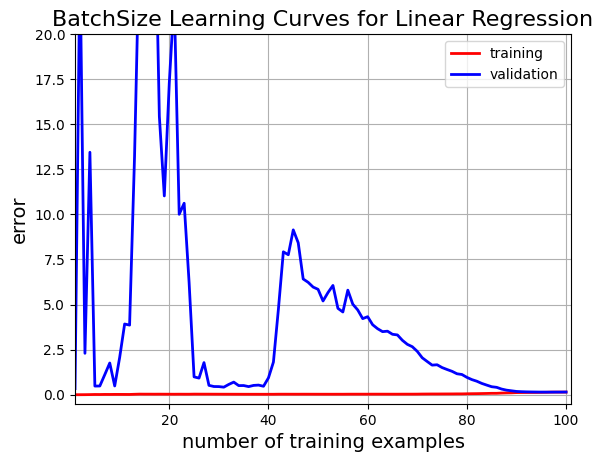

In [30]:
# 設定隨機種子，確保每次執行的結果一致（有利於實驗重現）
np.random.seed(89)

# 定義生成樣本的數量
n_pts = 100

# 呼叫 sample 函數生成訓練集與驗證集 (假設 sample 函數返回 x 和 y 向量)
x_train, y_train = sample(n_pts)
x_valid, y_valid = sample(n_pts)

# 設定多項式的最高階數 K
# K=1 為線性，K=2 為二次方（拋物線），K 越大模型越複雜
# 目前設定 K = 2
K = 2

# 特徵工程：多項式特徵擴展
# 將單一特徵 x 轉換為 [x^1, x^2, ..., x^K] 的矩陣形式
# 例如 K=2 時，X_train 會變成每一列包含 [x_i, x_i^2] 的矩陣
X_train = np.array([np.power(x_train, k+1) for k in range(K)]).transpose()
X_valid = np.array([np.power(x_valid, k+1) for k in range(K)]).transpose()

# 設定圖表標題
plt.title("BatchSize Learning Curves for Linear Regression", fontsize=16)

# 設定學習率與最大迭代次數
alpha = 0.3
iterations = 50000

# 執行學習曲線函數：
# 核心邏輯是隨著訓練樣本數量增加，計算訓練誤差與驗證誤差的變化，並繪圖
learning_curves_trainSize(X_train, y_train, X_valid, y_valid, alpha, iterations)

# 限制 y 軸範圍在 -0.5 到 20 之間，方便觀察誤差收斂的情況
plt.ylim(-0.5, 20)
plt.show()

Degree 1 - Train shape: (12, 1)
Degree 1 - Val shape: (21, 1)


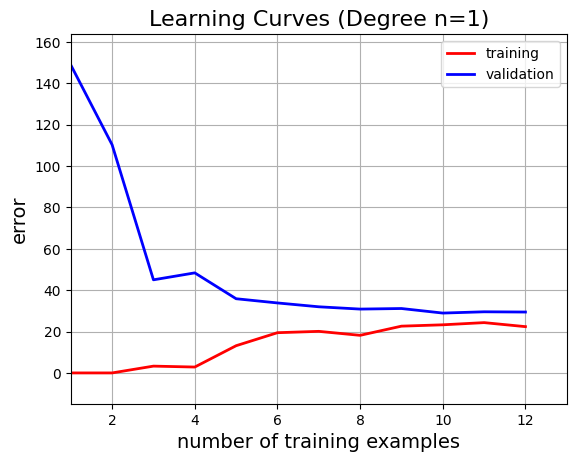

Degree 3 - Train shape: (12, 3)
Degree 3 - Val shape: (21, 3)


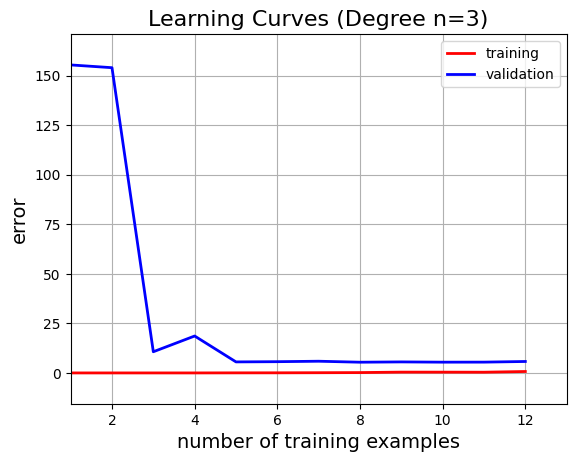

Degree 9 - Train shape: (12, 9)
Degree 9 - Val shape: (21, 9)


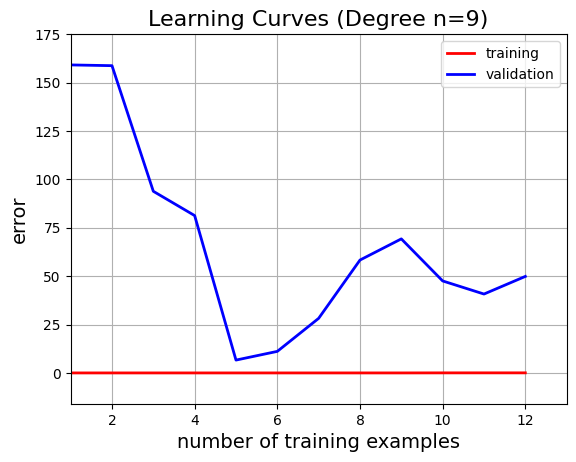

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# 讀取 .mat 格式的資料集（通常用於 Andrew Ng 的機器學習課程資料）
dataset = sio.loadmat("/content/drive/MyDrive/Colab Notebooks/Machine-Learning/Data/water.mat")
x_train = dataset["X"]
x_val = dataset["Xval"]
x_test = dataset["Xtest"]

# 將目標變量 y 壓縮成一維陣列，方便後續向量化運算
y_train = dataset["y"].squeeze()
y_val = dataset["yval"].squeeze()
y_test = dataset["ytest"].squeeze()

# 定義不同模型複雜度下的超參數
alphas = [0.3, 0.3, 0.3]        # 學習率
iterations = [100000, 100000, 100000]  # 迭代次數

# 針對不同的多項式階數 n (1, 3, 9) 進行循環
for i, n in enumerate([1, 3, 9]):
    # --- 1. 特徵構造：生成多項式特徵 [x^1, x^2, ..., x^n] ---
    x_train_n = np.hstack(tuple(x_train**(k+1) for k in range(n)))

    # --- 2. 特徵標準化 (Standardization) ---
    # 計算訓練集的均值與標準差（ddof=1 代表樣本標準差）
    train_means = x_train_n.mean(axis=0)
    train_stdevs = np.std(x_train_n, axis=0, ddof=1)

    # 對訓練集進行 Z-score 歸一化
    x_train_n = (x_train_n - train_means) / train_stdevs

    # --- 3. 處理驗證集特徵 ---
    x_val_n = np.hstack(tuple(x_val**(k+1) for k in range(n)))
    # 注意：驗證集必須使用「訓練集」的均值與標準差來縮放，以確保數據分佈一致
    x_val_n = (x_val_n - train_means) / train_stdevs

    # --- 4. 繪製與診斷 ---
    plt.title(f"Learning Curves (Degree n={n})", fontsize=16)
    print(f"Degree {n} - Train shape: {x_train_n.shape}")
    print(f"Degree {n} - Val shape: {x_val_n.shape}")

    # 呼叫先前定義的函數，繪製隨訓練樣本數增加時的誤差變化圖
    learning_curves_trainSize(x_train_n, y_train, x_val_n, y_val, alphas[i], iterations[i])
    plt.show()

In [32]:
def compute_loss_history(X,y,w_history):
    loss_history = []
    for w in w_history:
        errors = X@w[1:]+w[0]-y
        loss_history.append((errors**2).mean()/2)
    return loss_history

def learning_curves_iterations(X_train, y_train, X_valid, y_valid,alpha=0.3,iterations = 10000):
    w_history = linear_regression_vec(X_train, y_train,alpha,iterations)
    train_err = compute_loss_history(X_train, y_train,w_history)
    valid_err = compute_loss_history(X_valid, y_valid,w_history)

    plt.plot(range(1, len(train_err) + 1), train_err, c="r", linewidth=2)
    plt.plot(range(1, len(train_err) + 1), valid_err, c="b", linewidth=2)
    plt.xlabel("iterations", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    max_err = np.max( np.array([np.max(train_err),np.max(valid_err)]))
    min_err = np.min( np.array([np.min(train_err),np.min(valid_err)]))
    offset = (max_err-min_err)/10
    plt.axis([1, len(train_err)+1, min_err-offset, max_err+offset])
    plt.grid()

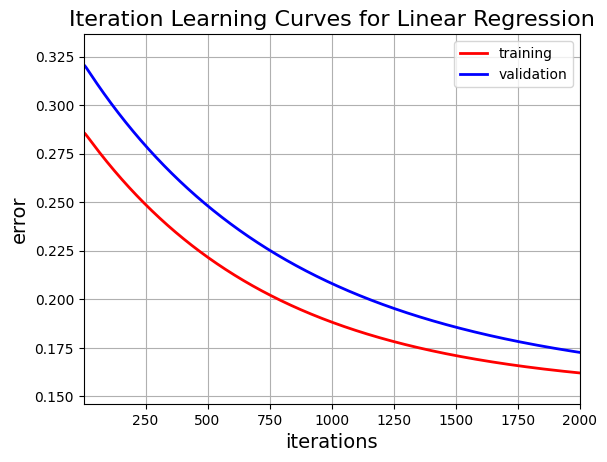

In [33]:
np.random.seed(89)
n_pts = 100
x_train,y_train =  sample(n_pts)
x_valid,y_valid =  sample(n_pts)

K = 2
X_train = np.array([np.power(x_train,k+1) for k in range(K)]).transpose()
X_valid = np.array([np.power(x_valid,k+1) for k in range(K)]).transpose()

plt.title("Iteration Learning Curves for Linear Regression", fontsize=16)

learning_curves_iterations(X_train, y_train, X_valid, y_valid,0.001,2000)
plt.show()

## 偏差和方差（Bias-Variance）

這段程式碼展示了如何生成一個複雜的 **波段函數（線性趨勢 + 正弦波）** 並進行隨機採樣。

2. 此函數的特性說明

* 連續性與多波段：透過 x + 2*np.sin(1.5*x)，你創造了一個具有向上趨勢但同時具有波峰與波谷的函數。這比單純的二次函數（拋物線）更難被低階多項式擬合。
* 數據採樣 ($N=8$)：由於樣本數非常少，若之後使用高階多項式（如 $K=9$）來擬合這些點，將會觀察到極其嚴重的過擬合 (Overfitting) 現象。
* 擬合挑戰：這個波形具有多個轉折點，若 $K$ 值太小（如 $K=1, 2$），模型會無法捕捉到正弦波的起伏（欠擬合）；若 $K$ 值適中，模型才能在震盪與趨勢間取得平衡。

[5.48813504 7.15189366 6.02763376 5.44883183 4.23654799 6.45894113
 4.37587211 8.91773001]
[ 7.29517174  5.42844713  6.8476723   8.07490062  4.76021771  5.99859773
  5.15171213 10.53345093]


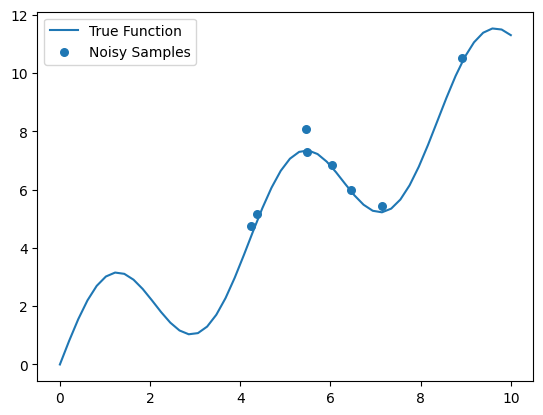

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
# 在 Jupyter Notebook 中直接顯示圖表
%matplotlib inline

# 固定隨機種子，確保每次執行的採樣點與雜訊都相同
np.random.seed(0)

# 定義目標波段函數：y = x + 2*sin(1.5*x)
# 這是一個結合了「線性成長」與「週期性波動」的複合函數
f = lambda x: x + 2 * np.sin(1.5 * x)

def plot_f(pts=50):
    """繪製真實函數的平滑曲線 (Ground Truth)"""
    x = np.linspace(0, 10, pts)
    f_val = f(x)
    plt.plot(x, f_val, label='True Function')

def sample_f(pts=8):
    """
    從目標函數中隨機採樣數據點
    pts: 採樣點數量
    """
    # 在 0 到 10 之間均勻隨機選取 x 坐標，這裡我們取 8 個資料
    x = np.random.uniform(0, 10, pts)

    # 計算對應的真實 y 值
    y_true = f(x)

    # 加入高斯雜訊 (平均值=0, 標準差=0.5)
    # y = 真實值 + 雜訊
    y = y_true + np.random.normal(0, 0.5, pts)
    return x, y

# --- 執行與視覺化 ---

# 1. 畫出背景的真實連續曲線
plot_f()

# 2. 生成 8 個帶有雜訊的觀測點
x_samples, y_samples = sample_f()
print(x_samples)
print(y_samples)

# 3. 在圖表上繪製這些採樣點
plt.scatter(x_samples, y_samples, s=30, label='Noisy Samples')
plt.legend()
plt.show()

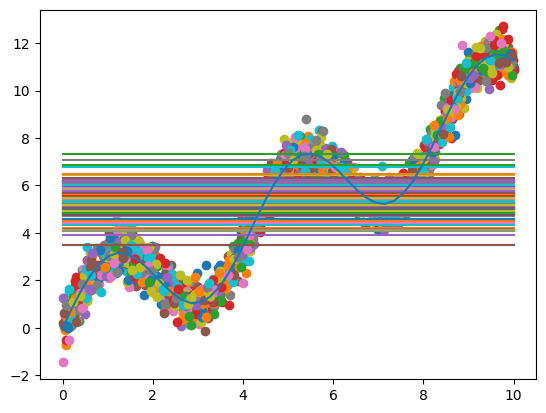

真正的函数值: 19.912751856809006
預測期望值: 5.348626589850284
預測的偏差: -14.564125266958722
預測的方差: 0.7240080347500965


In [35]:
# 設定重複實驗的次數（訓練集組數）
train_set_num = 100

def plot_b(b, pts=10):
    """繪製水平線函數 (y = b)"""
    x = np.linspace(0, 10, pts)
    # 建立一個長度為 pts，數值全為 b 的列表
    hat_f = [b for i in range(pts)]
    plt.plot(x, hat_f)

# 用來儲存每次實驗得到的平均值 (Model parameters)
bs = []

# 開始進行 100 次獨立的擬合實驗
for i in range(train_set_num):
    # 每次從真實函數中隨機抽取 20 個帶雜訊的樣本點
    x, y = sample_f(20)

    # 在圖表上畫出這些點（會看到 100 組不同顏色的點疊在一起）
    plt.scatter(x, y)

    # 核心邏輯：使用「平均值」作為最簡單的擬合模型 (y = b)
    b = np.mean(y)
    bs.append(b)

    # 畫出這組數據對應的水平預測線
    plot_b(b)

# 畫出原本最真實的函數曲線 (Ground Truth)
plot_f()
plt.show()

# --- 定量分析：偏差 (Bias) 與 方差 (Variance) ---

# 設定一個測試點 x = 18（注意：這超出了原本採樣的範圍 0-10）
x = 18
f_true = f(x)               # 該點真正的函數值
f_predict_mean = np.mean(bs) # 100 次實驗預測值的平均（期望值）

print("真正的函数值:", f_true)
print("預測期望值:", f_predict_mean)

# 偏差 (Bias)：預測期望值與真實值之間的差距
# 反映模型的「準確性」（模型是否太簡單而無法學到規律）
print("預測的偏差:", f_predict_mean - f_true)

# 方差 (Variance)：預測值的標準差
# 反映模型的「穩定性」（模型是否隨數據變動而劇烈跳動）
print("預測的方差:", np.std(bs))

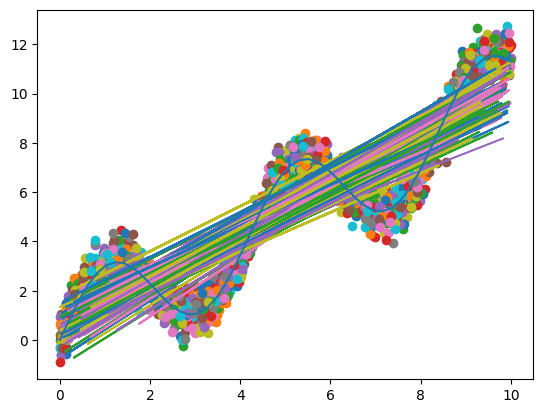

真正的函数值: 19.912751856809006
预测期望值: 17.814558700819234
预测的偏差: -2.0981931559897724
预测的方差: 1.4899282532858096


In [36]:
# --- 定義繪圖函數 ---
def draw_line(plt, w, b, x, linewidth=2):
    """根據權重 w 和截距 b 畫出直線"""
    m = len(x)
    f = [0] * m
    for i in range(m):
       f[i] = b + w * x[i]
    # 注意：這裡的 plt.plot(x, f, linewidth) 可能會因為 linewidth 傳入位置導致顏色錯誤
    plt.plot(x, f, linewidth)

ws = [] # 用於儲存每一輪實驗得到的係數矩陣 [b, w]

# --- 進行多次重複實驗 ---
for i in range(train_set_num):
    # 1. 採樣：每次取得 20 個新的帶雜訊數據點
    x, y = sample_f(20)
    plt.scatter(x, y) # 畫出該次實驗的樣本點

    # 2. 構造設計矩陣 X：[1, x] 形式，用於線性回歸
    # np.ones 產生截距項 (Intercept)，x[:, None] 產生斜率項 (Slope)
    X = np.hstack((np.ones((len(x), 1), dtype=x.dtype), x[:, None]))

    # 3. 正規方程求解：w = (X^T * X)^-1 * X^T * y
    XT = X.transpose()
    XTy = XT @ y
    w = np.linalg.inv(XT @ X) @ XTy # w[0] 是截距 b, w[1] 是斜率 w

    # 4. 繪製該次實驗學到的直線
    draw_line(plt, w[1], w[0], x)
    ws.append(w)

# 畫出背景的真實函數曲線 (波浪線)
plot_f()
plt.show()

# --- 偏差 (Bias) 與 方差 (Variance) 定量分析 ---
x_test = 18 # 設定測試點
f_true = f(x_test) # 真實值

# 計算這 100 次實驗對 x=18 的預測結果
# 注意：這裡的解包 [w*x+b for w,b in ws] 對應 ws 裡的 [b, w]
f_predict = np.array([ w_val[1] * x_test + w_val[0] for w_val in ws])

f_predict_mean = np.mean(f_predict) # 預測的期望值
print("真正的函数值:", f_true)
print("预测期望值:", f_predict_mean)
print("预测的偏差:", f_predict_mean - f_true)
print("预测的方差:", np.std(f_predict))

# 正則化

加入正規項（Regularization term）後的損失函數變為：

$$L(x;\pmb w) = \frac{1}{2m} \sum_{i=1}^{m} {\| \pmb x^{(i)}\pmb w - \pmb y^{(i)} \|}^2 +\lambda \|\pmb w^2 \| \tag{3-28}$$

其中：

$$\|\pmb w^2 \| = {w_0}^2+  {w_1}^2 +\cdots+ {w_n}^2$$

新的損失函數梯度（Gradient）變為：

$$\nabla L(\pmb w ) = \frac{1}{m} \sum_{i=1}^{m} ( \pmb x^{(i)}\pmb w - \pmb y^{(i)}) x^{(i)}+ 2\lambda \pmb w \tag{3-29}$$

因此，在使用梯度下降法（Gradient Descent）求偏微分時，只需要在計算時加上後方這一項的梯度即可。以下是加入懲罰項（Penalty term）版本的梯度下降法：

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# 讀取 .mat 格式的資料集（通常用於 Andrew Ng 的機器學習課程資料）
dataset = sio.loadmat("/content/drive/MyDrive/Colab Notebooks/Machine-Learning/Data/water.mat")
x_train = dataset["X"]
x_val = dataset["Xval"]
x_test = dataset["Xtest"]

# 將目標變量 y 壓縮成一維陣列，方便後續向量化運算
y_train = dataset["y"].squeeze()
y_val = dataset["yval"].squeeze()
y_test = dataset["ytest"].squeeze()

def gradient_descent_reg(X, y, reg, alpha, num_iters, gamma=0.8, epsilon=1e-8):
    w_history = []          # 紀錄迭代過程中的參數
    # 在特徵矩陣左側添加一行全為 1 的行向量，代表截距項 (bias)
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))

    num_features = X.shape[1]

    v = np.zeros_like(num_features) # 初始化動量項 (velocity)
    w = np.zeros(num_features)      # 初始化權重參數

    for n in range(num_iters):
        predictions = X @ w                 # 計算假設函數的預測值，即 f(x)
        errors = predictions - y            # 計算預測值與真實值之間的誤差

        # 計算基礎梯度
        gradient = X.transpose() @ errors / len(y)

        # 加入正規化項的梯度 (L2 Regularization)
        gradient += 2 * reg * w

        # 檢查梯度是否已經足夠小（收斂條件）
        if np.max(np.abs(gradient)) < epsilon:
            print("梯度已足夠小，停止迭代！")
            print("總迭代次數為：", n)
            break

        # 使用帶有動量的更新公式 (Momentum Update)
        # v 代表累積的動量，gamma 為衰減係數
        v = gamma * v + alpha * gradient
        w = w - v

        w_history.append(w)

    return w_history  # 回傳優化後的參數歷史紀錄

In [72]:
def loss_reg(w, X, y, reg=0.):
    """
    計算帶有正規化項的單次損失值
    """
    # X@w[1:] + w[0] 是將偏置項 (bias) w[0] 與權重項 w[1:] 分開計算
    errors = X @ w[1:] + w[0] - y

    # 計算正規化懲罰項 (Penalty term)，這裡 w 包含 bias，實務上通常只對權重做正規化
    reg_error = reg * np.sum(np.square(w))

    # 回傳 均方誤差 (MSE) 的一半加上正規化誤差
    return (errors**2).mean() / 2 + reg_error

def compute_loss_history_reg(X, y, w_history, reg=0.):
    """
    計算整個訓練過程中的損失函數歷史紀錄
    """
    loss_history = []
    for w in w_history:
        loss_history.append(loss_reg(w, X, y, reg))
    return loss_history

def plot_history_predict(X, y, w, loss_history, fig_size=(12, 4)):
    # 獲取當前的圖表對象
    fig = plt.gcf()
    # 設定圖表顯示的尺寸
    fig.set_size_inches(fig_size[0], fig_size[1], forward=True)

    # 繪製左側子圖：損失函數的收斂曲線
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title("Loss Convergence")

    # 在特徵矩陣左側添加一列全為 1 的向量，代表截距項 (bias)
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))
    # 提取第一個特徵維度作為 x 軸（假設為簡單線性回歸或視覺化主要特徵）
    x = X[:, 1]

    # 計算模型的預測值
    predicts = X @ w

    # 繪製右側子圖：預測結果與原始資料散佈圖
    plt.subplot(1, 2, 2)
    plt.scatter(x, predicts) # 繪製預測點的散佈圖

    # 將 x 座標由大到小排序，確保繪製摺線圖時不會出現亂序的線條
    indices = x.argsort()
    sorted_x = x[indices[::-1]]
    sorted_predicts = predicts[indices[::-1]]

    # 繪製擬合後的紅色回歸線
    plt.plot(sorted_x, sorted_predicts, color = 'red')

    # 繪製原始資料的散佈圖，用來對比模型擬合效果
    plt.scatter(x, y)
    plt.title("Prediction vs Reality")
    plt.show()

梯度已足夠小，停止迭代！
總迭代次數為： 702
最終權重 w: [8.0125638  5.7702013  3.33374364 3.45447779 2.09236533 2.04302423
 1.33515409 1.19533912 0.85628788 0.68738516]


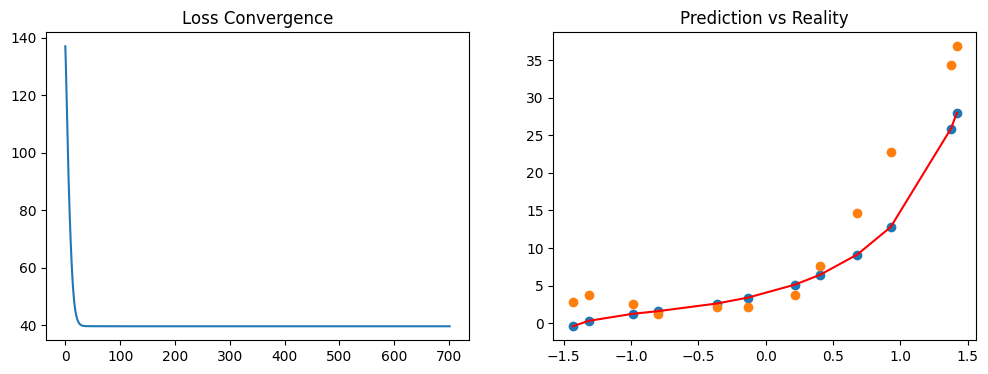

In [76]:
reg = 0.2              # 正規化參數 (lambda)，用來控制處罰項的強度
iterations = 100000    # 迭代次數
alpha = 0.01           # 學習率 (Learning Rate)，通常需要視情況調整

# 執行帶有正規化的梯度下降演算法
history = gradient_descent_reg(x_train_n, y_train, reg, alpha, iterations)

# 印出訓練完成後的最終權重參數
print("最終權重 w:", history[-1])

# 計算整個訓練過程中的損失函數歷史紀錄
loss_history = compute_loss_history_reg(x_train_n, y_train, history, reg)

# 繪製損失函數收斂曲線與模型預測結果
plot_history_predict(x_train_n, y_train, history[-1], loss_history)

In [74]:
def learning_curves(X_train, y_train, X_val, y_val, reg, alpha=0.3, iterations=1000):
    # 初始化訓練誤差與驗證誤差的陣列，長度與訓練樣本數相同
    train_err = np.zeros(len(y_train))
    val_err = np.zeros(len(y_train))

    # 透過循環增加訓練樣本數量，觀察模型在不同資料量下的表現
    for i in range(1, len(y_train)):
        # 使用前 i+1 個樣本進行訓練，獲取權重歷史
        w_history = gradient_descent_reg(X_train[0:i + 1, :], y_train[0:i + 1], reg, alpha, iterations)
        # 取得最後一次迭代優化後的權重
        w = w_history[-1]

        # 計算當前樣本規模下的訓練誤差（Training Error）
        train_err[i] = loss_reg(w, X_train[0:i + 1, :], y_train[0:i + 1], reg)
        # 計算在完整驗證集上的驗證誤差（Validation Error）
        val_err[i] = loss_reg(w, X_val, y_val, reg)

    # 繪製訓練誤差曲線（紅色）
    plt.plot(range(2, len(y_train) + 1), train_err[1:], c="r", linewidth=2)
    # 繪製驗證誤差曲線（藍色）
    plt.plot(range(2, len(y_train) + 1), val_err[1:], c="b", linewidth=2)

    # 設定圖表標籤與圖例
    plt.xlabel("number of training examples", fontsize=14) # 訓練樣本數量
    plt.ylabel("error", fontsize=14)                      # 誤差值
    plt.legend(["training", "validation"], loc="best")    # 圖例：訓練集與驗證集

    # 設定圖表範圍與網格
    plt.axis([2, len(y_train), 0, 100])
    plt.grid()

(12, 9)
(2,)
(21, 9)
梯度已足夠小，停止迭代！
總迭代次數為： 397
梯度已足夠小，停止迭代！
總迭代次數為： 538
梯度已足夠小，停止迭代！
總迭代次數為： 614
梯度已足夠小，停止迭代！
總迭代次數為： 626
梯度已足夠小，停止迭代！
總迭代次數為： 601
梯度已足夠小，停止迭代！
總迭代次數為： 693
梯度已足夠小，停止迭代！
總迭代次數為： 699
梯度已足夠小，停止迭代！
總迭代次數為： 697
梯度已足夠小，停止迭代！
總迭代次數為： 697
梯度已足夠小，停止迭代！
總迭代次數為： 694
梯度已足夠小，停止迭代！
總迭代次數為： 702


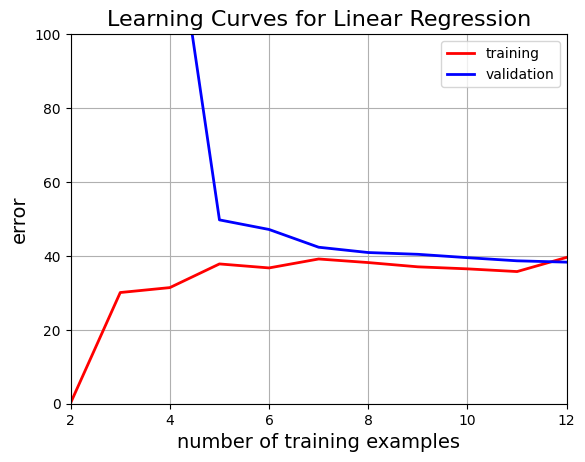

In [75]:
# 對驗證集進行多項式特徵擴展，產生 x, x^2, ..., x^n 的特徵矩陣
x_val_n  = np.hstack(tuple(x_val**(i+1) for i in range(n)))

# 使用訓練集的均值 (mean) 與標準差 (standard deviation) 對驗證集進行標準化（Scaling）
# 這是為了確保驗證集與訓練集處於相同的數值分佈空間
x_val_n = (x_val_n - train_means) / train_stdevs

# 設定圖表標題：線性回歸的學習曲線
plt.title("Learning Curves for Linear Regression", fontsize=16)

# 印出訓練集、權重與驗證集的維度 (Shape)，用於除錯與確認矩陣運算一致性
print(x_train_n.shape)
print(w.shape)
print(x_val_n.shape)

# 設定正規化參數 lambda 為 0.2
reg = 0.2

# 呼叫 learning_curves 函式，開始繪製訓練誤差與驗證誤差隨樣本數增加的變化圖
learning_curves(x_train_n, y_train, x_val_n, y_val, reg, alpha, iterations)